# Exercise 4 - Solution
***

<div class=obj>
    <b>Aim:</b> To readin and visualise the data from a large data file.
</div>

<p></p>



/home/oscar/.venvs/py3/lib/python3.13/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/tmp/ipykernel_5645/1914269283.py:53: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('jet')


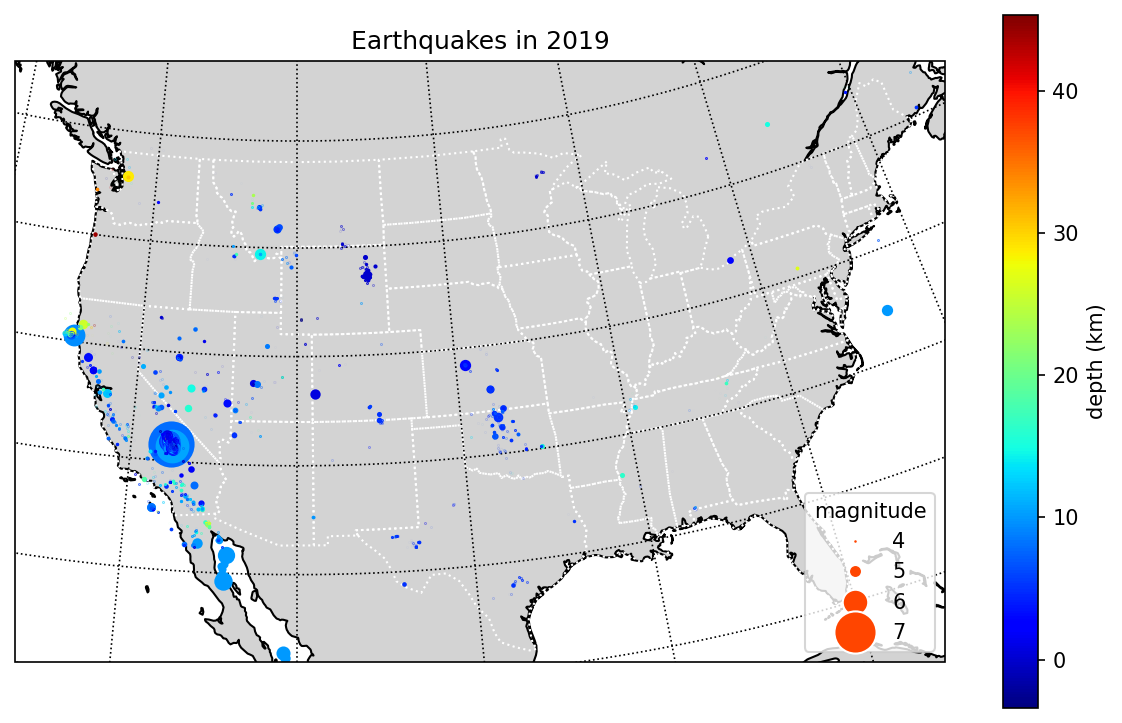

In [7]:
import pandas as pd
import cartopy as ctp
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
from matplotlib import cm
import numpy as np
#we need this next import to manually construct the legend
from matplotlib.lines import Line2D

#readin earthquake data
df = pd.read_csv('../exercises/data/us_eqs.csv',header=0,index_col=None)

#define the plot area
fg = plt.figure(figsize=(10,6));

#add a subplot specifuing the project and the central longitude
ax = fg.add_subplot(1, 1, 1,
                         projection=ccrs.AlbersEqualArea(central_longitude=-110))
#set the axes extent so that the plot focuses on the continental US
ax.set_extent([-125, -75, 25, 50], crs=ccrs.Geodetic())

#add coastlines
feature = ctp.feature.NaturalEarthFeature(
        name='coastline', category='physical',
        scale='50m',
        edgecolor='#000000', facecolor='lightgrey')
ax.add_feature(feature)

#add gridlines, plotting them behind the landmass
gl = ax.gridlines(linestyle=':', color='k', zorder=-1);

#add the state boundaries
shapename = 'admin_1_states_provinces_lakes'
states_shp = shpreader.natural_earth(
        resolution='110m',
        category='cultural', 
        name=shapename
)

ax.add_geometries(
        shpreader.Reader(states_shp).geometries(),
        ccrs.PlateCarree(),
        facecolor='None',edgecolor='white',linestyle=':'
        )

#plot points colored and scaled
# for color, we need to setup a colormap to convert the depth value into a color for us
# we do this using matplotlib's colormap property
norm = clrs.Normalize(df.depth.min(), df.depth.max())
#we then decide the colormap we want and store this as an object
cmap = cm.get_cmap('jet')

#getting the marker size right requires some trial and error, but using the raw magnitude 
# does not usefully distinguish the different events, let's make the size go as magnitude squared
size_fac = 2

#we need to loop over data, here we sort the dataframe so that the largest eruptions are plotted first
for d in df.sort_values('mag', ascending=False).iterrows():
    #store the color 
    color = d[1].depth

    #plot the data, notice that we call 'cmap(norm(color))', i.e., we normalise our depth using `norm()' and pass the 
    # output to cmap to give an RGB color to us
    # we also set marker size based on magnitude, but remembering to shift all the magnitudes to positive numbers, 
    # else the smaller earthquakes start getting larger symbols (look at the output of df.mag.min())
    ax.plot(d[1].longitude, d[1].latitude, marker='o', color=cmap(norm(color)), markersize=(d[1].mag-df.mag.min())**size_fac,
            transform=ccrs.Geodetic(), linestyle='None')

#plot on the scale bar following the hint of how to do this from stackoverflow.
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
plt.colorbar(sm,ax=ax, label='depth (km)')

#plot the legend, taking the code we used in the Exercise 4 example.  Here, we need to remember to use the same
# symbol size calculation that we use in plotting the symbols above
legend_elements = [Line2D([0], [0], marker='o', ls = '', color='w', label='4', markeredgecolor='white',
                          markerfacecolor='orangered', markersize=(4-df.mag.min())**size_fac),
                   Line2D([0], [0], marker='o', ls = '', color='w', label='5', markeredgecolor='white',
                          markerfacecolor='orangered', markersize=(5-df.mag.min())**size_fac),
                  Line2D([0], [0], marker='o', ls = '', color='w', label='6', markeredgecolor='white',
                          markerfacecolor='orangered', markersize=(6-df.mag.min())**size_fac),
                  Line2D([0], [0], marker='o', ls = '', color='w', label='7', markeredgecolor='white',
                          markerfacecolor='orangered', markersize=(7-df.mag.min())**size_fac)]

ax.legend(handles=legend_elements, title='magnitude', loc='lower right')

ax.set_title('Earthquakes in 2019');

The above map shows that seismicity is concentrated in the western US.  Why is seismicity focussed here?  And is our result consistent with the USGS's __[longterm seismic hazard forcast](https://www.usgs.gov/media/images/2018-long-term-national-seismic-hazard-map)__?

Why is there a band of seismicity running across the central US?

In [3]:
from IPython.core.display import HTML
def css_styling():
    styles = open(".styles/custom.css", "r").read()
    return HTML(styles)
css_styling()